In [1]:
import numpy as np
import cv2
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [ ]:
pytesseract

In [2]:
# Reading Image
img = cv2.imread("car1.png")
#cv2.namedWindow("Original Image",cv2.WINDOW_NORMAL)


In [3]:
type(img)

numpy.ndarray

In [4]:
img.ndim

3

In [5]:
img.shape

(592, 896, 3)

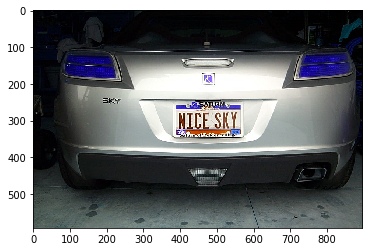

In [6]:
plt.imshow(img)

In [7]:
# Creating a Named window to display image
cv2.imshow("Original Image",img)

In [8]:
img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
#cv2.namedWindow("Gray Converted Image",cv2.WINDOW_NORMAL)
# Creating a Named window to display image
#cv2.imshow("Gray Converted Image",img_gray)

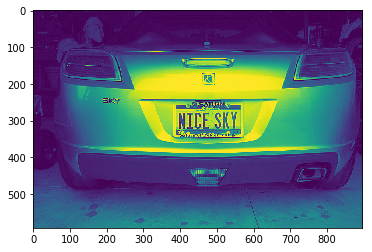

In [9]:
plt.imshow(img_gray)

In [13]:
# Noise removal with iterative bilateral filter(removes noise while preserving edges)
noise_removal = cv2.bilateralFilter(img_gray,9,75,75)


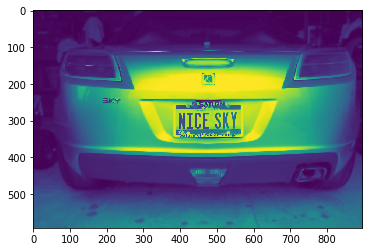

In [14]:
plt.imshow(noise_removal)

In [15]:
# Histogram equalisation for better results
equal_histogram = cv2.equalizeHist(noise_removal)
#cv2.namedWindow("After Histogram equalisation",cv2.WINDOW_NORMAL)
# Creating a Named window to display image
#cv2.imshow("After Histogram equalisation",equal_histogram)

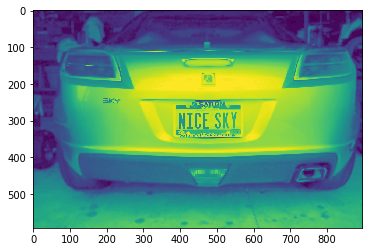

In [16]:
plt.imshow(equal_histogram)

In [17]:
# Morphological opening with a rectangular structure element
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
morph_image = cv2.morphologyEx(equal_histogram,cv2.MORPH_OPEN,kernel,iterations=15)
#cv2.namedWindow("Morphological opening",cv2.WINDOW_NORMAL)
# Creating a Named window to display image
#cv2.imshow("Morphological opening",morph_image)
# Display Image

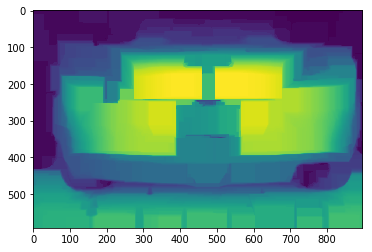

In [18]:
plt.imshow(morph_image)

In [19]:
# Image subtraction(Subtracting the Morphed image from the histogram equalised Image)
sub_morp_image = cv2.subtract(equal_histogram,morph_image)
#cv2.namedWindow("Subtraction image", cv2.WINDOW_NORMAL)
# Creating a Named window to display image
#cv2.imshow("Subtraction image", sub_morp_image)
# Display Image

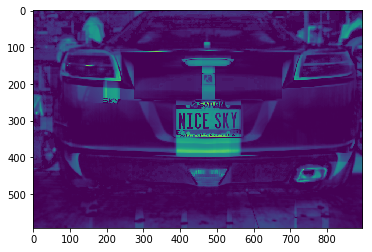

In [20]:
plt.imshow(sub_morp_image)

In [21]:
# Thresholding the image
ret,thresh_image = cv2.threshold(sub_morp_image,0,255,cv2.THRESH_OTSU)
#cv2.namedWindow("Image after Thresholding",cv2.WINDOW_NORMAL)
# Creating a Named window to display image
#cv2.imshow("Image after Thresholding",thresh_image)
# Display Image

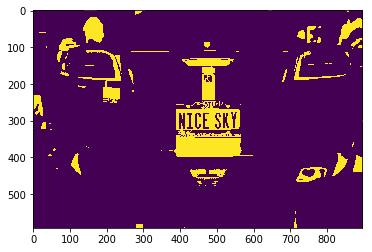

In [22]:
plt.imshow(thresh_image)

In [23]:
# Applying Canny Edge detection
canny_image = cv2.Canny(thresh_image,250,255)
#cv2.namedWindow("Image after applying Canny",cv2.WINDOW_NORMAL)
# Creating a Named window to display image
#cv2.imshow("Image after applying Canny",canny_image)
# Display Image
canny_image = cv2.convertScaleAbs(canny_image)



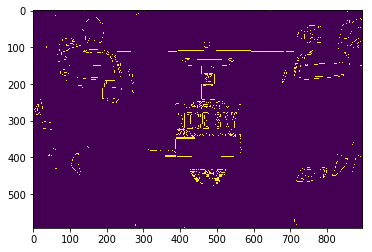

In [24]:
plt.imshow(canny_image)

In [25]:
# dilation to strengthen the edges
kernel = np.ones((3,3), np.uint8)
# Creating the kernel for dilation
dilated_image = cv2.dilate(canny_image,kernel,iterations=1)
#cv2.namedWindow("Dilation", cv2.WINDOW_NORMAL)
# Creating a Named window to display image
#cv2.imshow("Dilation", dilated_image)
# Displaying Image

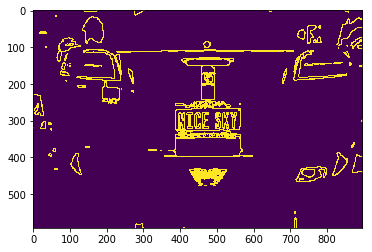

In [26]:
plt.imshow(dilated_image)

In [27]:
# Finding Contours in the image based on edges
new,contours, hierarchy = cv2.findContours(dilated_image, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
contours= sorted(contours, key = cv2.contourArea, reverse = True)[:25]
# Sort the contours based on area ,so that the number plate will be in top 10 contours
screenCnt = None
# loop over our contours
for c in contours:
 # approximate the contour
 peri = cv2.arcLength(c, True)
 approx = cv2.approxPolyDP(c, 0.06 * peri, True)  # Approximating with 6% error
 # if our approximated contour has four points, then
 # we can assume that we have found our screen
 if len(approx) == 4:  # Select the contour with 4 corners
  screenCnt = approx
  break
final = cv2.drawContours(img, [screenCnt], -1, (0, 255, 0), 3)
# Drawing the selected contour on the original image
#cv2.namedWindow("Image with Selected Contour",cv2.WINDOW_NORMAL)
# Creating a Named window to display image
#cv2.imshow("Image with Selected Contour",final)

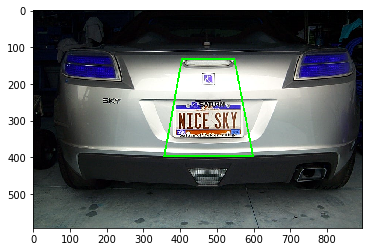

In [28]:
plt.imshow(final)

In [29]:
# Masking the part other than the number plate
mask = np.zeros(img_gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
new_image = cv2.bitwise_and(img,img,mask=mask)
#cv2.namedWindow("Final_image",cv2.WINDOW_NORMAL)
cv2.imshow("Final_image",new_image)



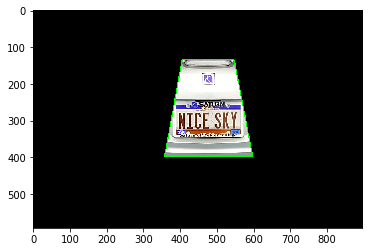

In [30]:
plt.imshow(new_image)

In [31]:
# Histogram equal for enhancing the number plate for further processing
y,cr,cb = cv2.split(cv2.cvtColor(new_image,cv2.COLOR_RGB2YCrCb))
# Converting the image to YCrCb model and splitting the 3 channels
y = cv2.equalizeHist(y)
# Applying histogram equalisation
final_image = cv2.cvtColor(cv2.merge([y,cr,cb]),cv2.COLOR_YCrCb2RGB)
# Merging the 3 channels
#cv2.namedWindow("Enhanced Number Plate",cv2.WINDOW_NORMAL)
# Creating a Named window to display image
#cv2.imshow("Enhanced Number Plate",final_image)
# Display image
#cv2.waitKey() # Wait for a keystroke from the user


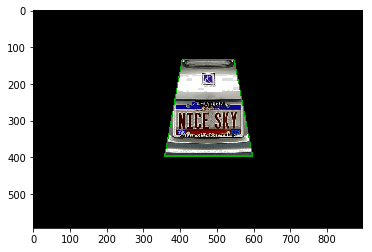

In [32]:
plt.imshow(final_image)

In [1]:
import pytesseract

In [2]:
from pytesseract import image_to_string
from PIL import Image

In [3]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract'


In [5]:
text = image_to_string('photo.jpg')
print(text)